## All machine learning models are divided into supervised and unsupervised 


## First:  Supervised models 


### 1- KNN 

- Simple, but a very powerful classification algorithm
<br>
- Classifies based on a similarity measure
<br>
- Non parametric algorithm
<br>
- Lazy learning: Does not actually LEARN until the test example is given to it.
<br>
- Classified by MAJORITY VOTES.
<br>
- Voronoi diagram: Describes the areas that are nearest to any given point, given a set of data.
<br>
- Decision Boundaries formed by voroni cells, many/large number of  boundaries cause overfitting. 
<br>
- Larger k produces smoother boundary effect.
<br>
- K nearest neighborrrrrrr algorithm forms majority vote between the K most similar instances to a given unseen observation, similarity is defined according to a distance metric between two data points. 
<br>
- This distance can be calculated by multiple methods such as (Euclidean distance method,Minkowski Distance,Hamming Distance)
<br>
- Pros: Simple to implement, Flexible to feature/distance choices, Naturally handles multi class cases, Can do well in practice with enough representative data
<br>
- Cons: Need to determine the value of parameter K (number of nearest neighbors), Computation cost is quite high, Can require lots of memory if data set is large


In [134]:
#Importing libraries 
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

#Import and load the dataset 
df = pd.read_csv(r'C:\Users\Dalia\Downloads\Social_Network_Ads (1).csv')
#Explore dataset 
df.head() #shows the first 5 rows of the dataframe 

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


### Data splitting 
- Split columns to features and target 
<br>
- Split rows to train and test 

In [135]:
#separate predictors/features columns from target column (كده بنفصلهم بالطول )

#First the columns that will help me predict, they are called (Predictors or Features or independent variables) 
X = df.iloc[:, [2,3]].values #Age & Salary 

#Second the column I want to predict, It is called (Target variable or dependent variable)
y = df.iloc[:,4].values #Label/Purchased 

- The iloc function in Python returns a view of the selected rows and columns from a Pandas DataFrame 
<br>
- df.iloc[[rows range], [columns range]] , in our example we gave only a column range and we left rows as it is. 

In [136]:
#Splitting the dataset into the trainng set and test set (كده بنفصلهم بالعرض)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train , y_test = train_test_split (X, y, test_size = 0.25, random_state = 0)

#train_test_Split a ready function in sklearn khadet al splitted COLUMNS in the previous cell 
#then we splitted the dataset ROWS la 75% for training and 25% for testing 

### Feature Scaling 
- Feature Scaling allows all variables in the dataset to be on the same scale to avoid the domaination of one feature over the other and its techniques can be divided into normalization and standardization.  
<br>
- We are going to use standardization with KNN which scales the data values to have a mean of zero and standard deviation of 1 

In [137]:
#feature scaling through standardization 
from sklearn.preprocessing import StandardScaler 
sc = StandardScaler() #create an instance of StandardScaler to use in my code 
X_train = sc.fit_transform(X_train) #standardizing the train rows of the features/predictors columns
X_test = sc.fit_transform(X_test) #standardizing the test rows of the features/predictors columns

- StandardScaler in Sklearn : Standardize features by removing the mean and scaling to unit variance.
<br>
- fit_transform , function inside standard scaler and it Fit to data, then transform it.

### Train the model  
- We call the KNN classifier from sklearn and fit the train data on it
<br>
- We will iterate between range of K values to find the best K 

In [138]:
#Fitting classifier to the training set 
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics #it shows us the results and the scores of accuracy 

k_range = range(1,26) #we will try to find the best K value between 1 and 26 
scores= {} #a dictionary to store the results of every k in the range 
scores_list = []
for k in k_range:
    #create instance of the knn classifier 
    classifier = KNeighborsClassifier(n_neighbors = k)
    #giving the created instance the train data both the features the target 
    classifier.fit(X_train, y_train) 
    #giving the model the features test data and store their predicition in y_pred
    y_pred = classifier.predict(X_test)
    #now we get the accuracy by comparing the prediction to the actual target test data 
    scores[k] = metrics.accuracy_score(y_test, y_pred)
    scores_list.append(metrics.accuracy_score(y_test, y_pred))
    
    
#show scores of all the k values
scores

{1: 0.88,
 2: 0.88,
 3: 0.93,
 4: 0.93,
 5: 0.93,
 6: 0.93,
 7: 0.93,
 8: 0.93,
 9: 0.93,
 10: 0.93,
 11: 0.93,
 12: 0.93,
 13: 0.93,
 14: 0.93,
 15: 0.93,
 16: 0.93,
 17: 0.93,
 18: 0.93,
 19: 0.93,
 20: 0.93,
 21: 0.93,
 22: 0.93,
 23: 0.93,
 24: 0.93,
 25: 0.93}

- Apparently the accuracy didn't go up after the third K , so we can pick K = 3 as it's the lowest computation needed with the highest accuracy. 

Text(0, 0.5, 'Testing accuracy')

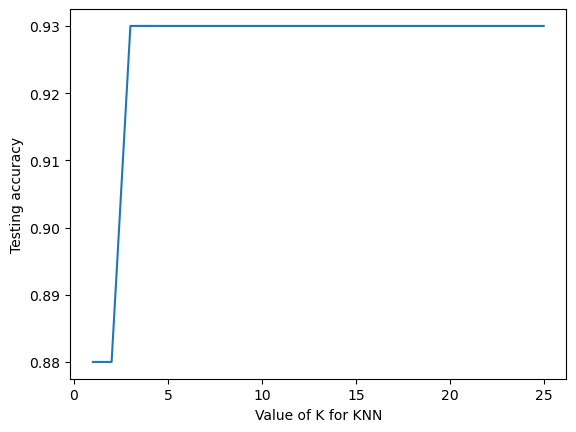

In [139]:
#Plot the relationship between K and the testing accuracy 
%matplotlib inline 
import matplotlib.pyplot as plt 
#plot draws a line chart given x values and y values as arguments -> plt.plot(x_values, y_values)
plt.plot(k_range, scores_list)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing accuracy')

In [140]:
#After choosing 3 as my k_value 
classifier = KNeighborsClassifier(n_neighbors = 3)
classifier.fit(X_train, y_train)
#Predicting the test set results 
y_pred = classifier.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1], dtype=int64)

### Evaluate the model  
- We do that through the confusion matrix


In [141]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm1 = metrics.accuracy_score(y_test, y_pred)
print ('Confusion matrix:\n', cm)
print ('accuracy:\n', cm1)

Confusion matrix:
 [[64  4]
 [ 3 29]]
accuracy:
 0.93


### 2- Decision Trees 

- A decision tree is a graphical representation of all the possible solutions to a decision based on certain conditions. It's also a non-parametric supervised machine learning model.
<br>
- Tree models where the target variable can take a finite set of values are called classification trees and target variable can take continuous values are called regression trees
<br>
- Entropy is the measure of randomness or unpredictability in the dataset and  it controls how a decision tree decisdes to split the data. 
<br>
- Information gain measures how much a feature gives us about the class & it's based in the decrease in entropy after a dataset is split on an attribute. 
<br>
- An attribute/feature with the highest Information gain will be tested/split first
<br>
- Pros: Decision trees are easy to visualize and interpret, can easily capture non linear patterns, can handle both numerical and categorical data, Little effort required for data preparation
<br>
- Cons: Overfitting is one of the most practical difficulties for decision tree models,Low accuracy for continuous variables, It's unstable as small change in the data can lead to a large change in the structure of the optimal decision tree


In [142]:
#importing libraries 
#import numpy as np
#import pandas as pd
#import matplotlib.pyplot as plt
#from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error

In [143]:
#read and explore the dataset 
df = pd.read_csv(r"C:\Users\Dalia\Downloads\kc_house_data (1).csv")
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [144]:
#filter missing values 
filtered_df = df.dropna(axis = 0)
filtered_df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [145]:
#list (filtered df.columns.values)
filtered_df = filtered_df[['id',
 'date',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'zipcode',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15',
 'price']]

filtered_df

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,7129300520,20141013T000000,3,1.00,1180,5650,1.0,0,0,3,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,221900.0
1,6414100192,20141209T000000,3,2.25,2570,7242,2.0,0,0,3,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,538000.0
2,5631500400,20150225T000000,2,1.00,770,10000,1.0,0,0,3,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,180000.0
3,2487200875,20141209T000000,4,3.00,1960,5000,1.0,0,0,5,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,604000.0
4,1954400510,20150218T000000,3,2.00,1680,8080,1.0,0,0,3,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,510000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,3,2.50,1530,1131,3.0,0,0,3,...,1530,0,2009,0,98103,47.6993,-122.346,1530,1509,360000.0
21609,6600060120,20150223T000000,4,2.50,2310,5813,2.0,0,0,3,...,2310,0,2014,0,98146,47.5107,-122.362,1830,7200,400000.0
21610,1523300141,20140623T000000,2,0.75,1020,1350,2.0,0,0,3,...,1020,0,2009,0,98144,47.5944,-122.299,1020,2007,402101.0
21611,291310100,20150116T000000,3,2.50,1600,2388,2.0,0,0,3,...,1600,0,2004,0,98027,47.5345,-122.069,1410,1287,400000.0


In [146]:
#separate predictors/features columns from target column (كده بنفصلهم بالطول )

#First the columns that will help me predict, they are called (Predictors or Features or independent variables) 
#This is a different way from iloc , it's by creating a list and writing the columns names directly
predictors_list = [ 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement']
predictor_data = filtered_df[predictors_list]
#Second the column I want to predict, It is called (Target variable or dependent variable)
prediction_target = filtered_df.price

predictor_data

,bedrooms,bathrooms,sqft_living,sqft_lot,sqft_above,sqft_basement
0,3,1.00,1180,5650,1180,0
1,3,2.25,2570,7242,2170,400
2,2,1.00,770,10000,770,0
3,4,3.00,1960,5000,1050,910
4,3,2.00,1680,8080,1680,0
...,...,...,...,...,...,...
21608,3,2.50,1530,1131,1530,0
21609,4,2.50,2310,5813,2310,0
21610,2,0.75,1020,1350,1020,0
21611,3,2.50,1600,2388,1600,0


In [147]:
#Decision tree regression model 
model = DecisionTreeRegressor() #create a model instance 
model.fit(predictor_data, prediction_target) #fit the data within the model instance 

DecisionTreeRegressor()

In [148]:
# exercise to check if model is working, just an extra - u can skip this step in coding 
print('Original data used as predictor_data:')
display(predictor_data.head())
print('\nPredicted data, using predictor_data and prediciton target:')
list(model.predict(predictor_data.head()))

Original data used as predictor_data:


,bedrooms,bathrooms,sqft_living,sqft_lot,sqft_above,sqft_basement
0,3,1.00,1180,5650,1180,0
1,3,2.25,2570,7242,2170,400
2,2,1.00,770,10000,770,0
3,4,3.00,1960,5000,1050,910
4,3,2.00,1680,8080,1680,0



Predicted data, using predictor_data and prediciton target:


[221900.0, 538000.0, 180000.0, 604000.0, 510000.0]

In [149]:
#Model evalauation 
#Calculating MAE: mean absolute error with in-sample mae 
print('MAE:')
model = DecisionTreeRegressor()
model.fit(predictor_data, prediction_target)
predicted_data = model.predict(predictor_data)
mean_absolute_error(prediction_target, predicted_data)

MAE:


1701.0697728219127

#### The doctor here missed a step of splitting the data rows to test and train. 
- Always note the step of splitting features and target and the step of splitting test and train both are mandatory steps in implementing any supervised machine learning model. 

### 3- Naive Bayes 

- As the name suggests, this algorithm makes an assumption as all the variables in the dataset is (EX: not correlated to each other) and that's why it's considered as a parametric algorithm.
<br>
- Naive Bayes is a very popular classification algorithm that is mostly used to get the base accuracy of the dataset
<br>
- Naïve Bayes classifiers are a family of simple "probabilistic classifiers" based on applying Bayes' theorem with strong independence assumptions between the features
<br>
- Bayes Theorem helps to find the probability of a hypothesis given our prior knowledge. With an assumption of independence among the features. 
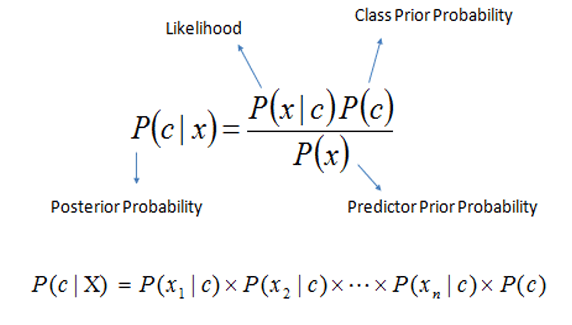
<br>
- Pros: It is easy and fast to predict the class of the test data set It also performs well in multi class prediction , When assumption of independence holds, a Naive Bayes classifier performs better compare to other models like logistic regression and you need less training data , It perform well in case of categorical input variables compared to numerical variable(s) 
<br>
- Cons: Naive Bayes is also known as a bad estimator, so the probability outputs are not to be taken too seriously , The assumption of independent predictors In real life, it is almost impossible that we get a set of predictors which are completely independent


In [150]:
# upload the dataset
df = pd.read_csv(r"C:\Users\Dalia\Downloads\Iris (1).csv")
df.head(10) #view first 10 rows of the dataset

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


### Data Preprocessing/Exploration  


In [151]:
#check the duplicates in the datatse using the ID "beacsuse its a unique value"
df.duplicated(subset=['Id']).sum()

0

In [152]:
# check the null values
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [153]:
# To check the rows and the columns
df.shape

(150, 6)

In [154]:
# To check about the information and what type of the data we have
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [155]:
# to display the number of samples on each class
df["Species"].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [156]:
#Drop the Id column as it will not contributed in the prediction model
df = df.drop(columns= ['Id'])

In [157]:
#Recheck the number of rows and columns
df.shape

(150, 5)

In [158]:
#To display statistics about the dataset
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


##### As this is a classification problem, It is necessary to check whether ot not the target feature is skewed i.e. imbalanced

Text(0.5, 1.0, 'Count plot of Species')

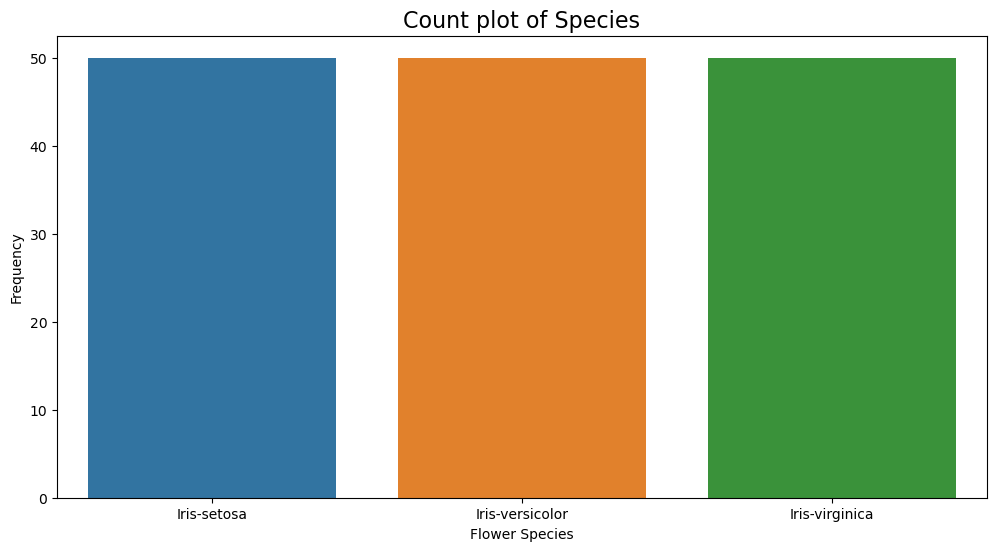

In [159]:
#checking class skewness
plt.figure(figsize=(12, 6))
sns.countplot(x='Species', data=df)
plt.xlabel('Flower Species')
plt.ylabel('Frequency')
plt.title('Count plot of Species', size=16)

### Exploratory analysis using data visualization


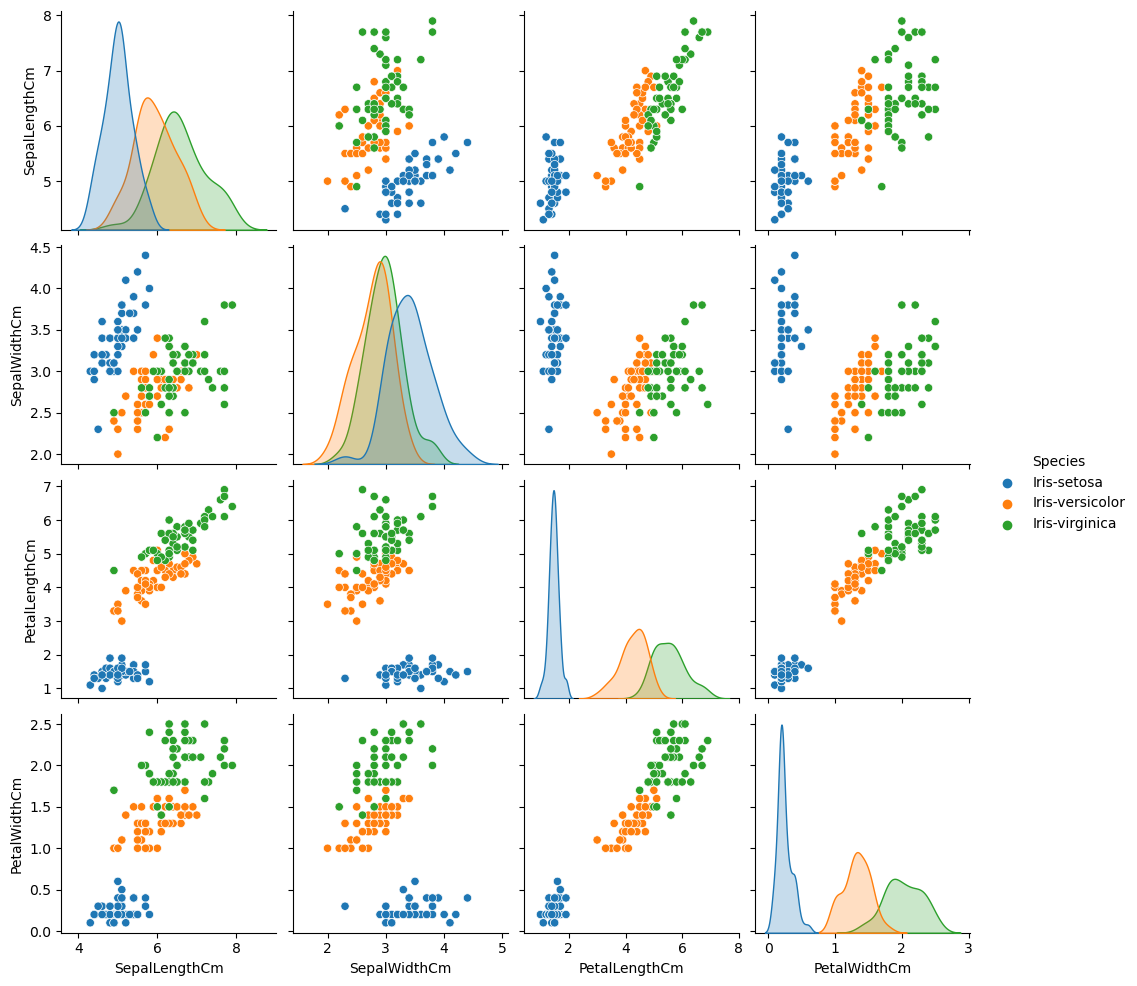

In [160]:
import seaborn as sns
g = sns.pairplot(df, hue='Species')
plt.show()

- After graphing the features in a pair plot, it is clear that the relationship between pairs of features of a irissetosa (in blue) is distinctly different from those of the other two species.
<br>
- There is some overlap in the pairwise relationships of the other two species, iris-versicolor (orange) and irisvirginica (green).
<br>
- Also, its shown that the Petal Features are giving a better cluster division compared to the Sepal features. This is an indication that the Petals can help in better and accurate Predictions over the Sepal. We will check that later.

Text(0.5, 1.0, 'Boxplot of Features')

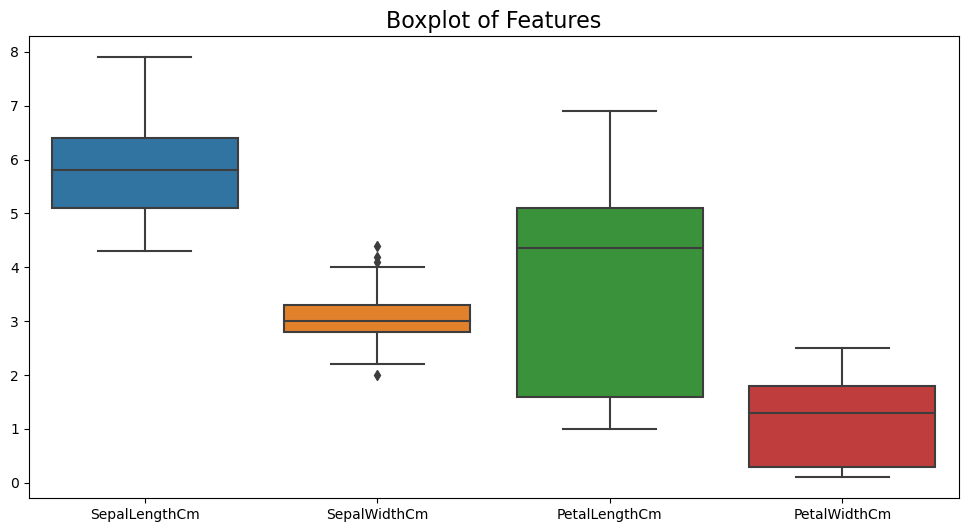

In [161]:
#boxplot of predictors
plt.figure(figsize=(12, 6))
sns.boxplot(data=df)
plt.title('Boxplot of Features', size=16)

- From positioning of boxplots, it can be interpreted that Petal width has minimum values and sepal length has highest values.
<br>
- From shape of boxplot, the petal length has highest spread i.e. most variance and the sepal width has lest spread i.e. least variance. In terms of skewness,
<br>
- Sepal length and sepal width are approximately normal distribution as the median line is in middle.
<br>
- Petal length and petal width are left-skewed as the majority part of the box is below the median.
<br>
- There are outliers in the Sepal width above 4 and below 2

### Feature selection Intro

Now, when we train any algorithm, the number of features and their correlation plays an important role. If there
are features and many of the features are highly correlated, then training an algorithm with all the featues will
reduce the accuracy. Thus features selection should be done carefully. This dataset has less featues but still we
will see the correlation.

In [162]:
# First calcuate the correlatio
correlation = df.corr()
correlation

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


Text(0.5, 1.0, 'Correlation Coefficient')

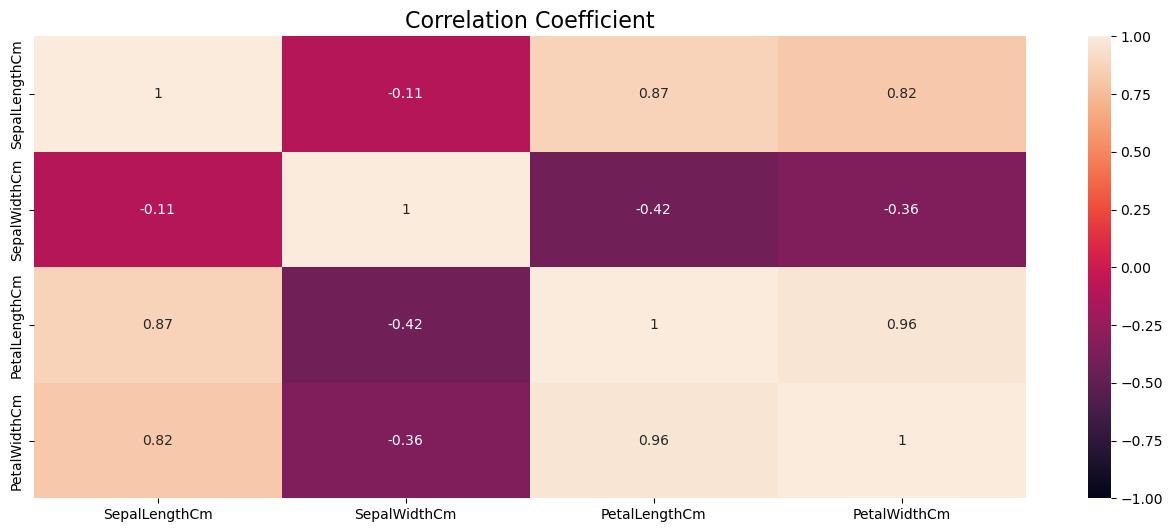

In [163]:
# Plot the correlation of the dataset
plt.figure(figsize=(16, 6))
sns.heatmap(correlation, vmin=-1, vmax=1, annot=True)
plt.title('Correlation Coefficient', size=16)


Overall, all the diagonal have value as 1 because the feature will have perfect positive correlation with itself.
As this is classification problem, there is no chance to find the correlation of features with target feature but
we can find the possibility of multicollinearity.
Considering the threshold of +/-90, petal length and petal width are highly correlated.

In [164]:
# use Label Encoder to convert the class varible into numeric format
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [165]:
# after converting the data will be stored again in the class variable
df["Species"] = le.fit_transform(df["Species"])

In [166]:
# create additional dictionary with mapping
le.fit(df['Species'])
le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(le_name_mapping)

{0: 0, 1: 1, 2: 2}


In [167]:
# Recheck
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


### Data splitting 
- Split columns to features and target 
<br>
- Split rows to train and test 

In [168]:
#separate predictors/features columns from target column (كده بنفصلهم بالطول )

#First the columns that will help me predict, they are called (Predictors or Features or independent variables) 
x = df.drop(columns=["Species"])
#Second the column I want to predict, It is called (Target variable or dependent variable)
y = df["Species"]

In [169]:
#Splitting the dataset into the trainng set and test set (كده بنفصلهم بالعرض)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state = 0)

### 3.1 Gaussian Naive Bayes
- Gaussian Naive Bayes is useful when working with features containing continuous values, which probabilities can be modeled using a Gaussian distribution (normal distribution).

In this lab, we will use a validation procedure called cross-validation (CV for short). A test set should still be held
out for final evaluation, but the validation set is no longer needed when doing CV. In the basic approach, called
k-fold cross validation, the training set is split into k smaller sets. The following procedure is followed for each of
the k “folds”: A model is trained using k - 1 of the folds as training data The resulting model is validated on the
remaining part of the data (i.e., it is used as a test set to compute a performance measure such as accuracy)


In [170]:
# Import function for k-fold cross validation
from sklearn.model_selection import cross_val_score
# Import the Gaussian Naive Bayes classifier
from sklearn.naive_bayes import GaussianNB
# Create a Gaussian Naive Bayes classifier with default parameters
gnb = GaussianNB()
# Use 10-fold cross validation to perform training and validation on the training set
# Parameter scoring = 'accuracy' will compute accuracy
scores = cross_val_score(gnb, x_train, y_train, cv = 10, scoring = 'accuracy')
# Display the array containing accuracy from 10 folds or iterations
scores

array([0.90909091, 0.90909091, 0.90909091, 0.90909091, 1.        ,
       1.        , 1.        , 0.9       , 1.        , 0.9       ])

In [171]:
scores.mean()

0.9436363636363636

In [172]:
# Print the mean accuracy score
print('Accuracy Validation =',scores.mean())

Accuracy Validation = 0.9436363636363636


#### Evaluate the model

In [173]:
# Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Running prediction
gnb.fit(x_train, y_train)
# Predict the target for the test dataset
test_predict = gnb.predict(x_test)
# Compute the model accuracy on the development set: How often is the classifier correct?
print("Accuracy Test: ", metrics.accuracy_score(y_test, test_predict))

Accuracy Test:  1.0


In [174]:
! pip install statsmodels

In [175]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [176]:
#Iteration 1
X1 = df[['PetalLengthCm', 'PetalWidthCm', 'SepalLengthCm', 'SepalWidthCm']]
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X1.columns
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X1.values, i)
for i in range(len(X1.columns))]
print(vif_data)

         feature         VIF
0  PetalLengthCm  173.968965
1   PetalWidthCm   55.488689
2  SepalLengthCm  264.745711
3   SepalWidthCm   97.111606


In [177]:
vif_data["VIF"]= [variance_inflation_factor(X1.values, i)
for i in range(len(X1.columns))]
print(vif_data)

         feature         VIF
0  PetalLengthCm  173.968965
1   PetalWidthCm   55.488689
2  SepalLengthCm  264.745711
3   SepalWidthCm   97.111606


In [178]:
X1 = X1.drop('SepalLengthCm', axis=1)

Using VIF, All of the features have high correlation in first iteration. As mentioned above, computing VIF must be
an iterative approach, we will remove the feature with maximum VIF "SepalLengthCm". you can try to compute
the VIF again and recheck the accuracy

In [179]:
#split the dataset again using the new X
x1_train, x1_test, y1_train, y1_test = train_test_split(X1, y, test_size=0.30, random_state=0)

In [180]:
# Import function for k-fold cross validation
from sklearn.model_selection import cross_val_score
# Import the Gaussian Naive Bayes classifier
from sklearn.naive_bayes import GaussianNB
# Create a Gaussian Naive Bayes classifier with default parameters
gnb = GaussianNB()
# Use 10-fold cross validation to perform training and validation on the training set
# Parameter scoring = 'accuracy' will compute accuracy
scores = cross_val_score(gnb, x1_train, y1_train, cv = 10, scoring = 'accuracy')
# Display the array containing accuracy from 10 folds or iterations
scores

array([0.90909091, 0.90909091, 0.90909091, 1.        , 1.        ,
       1.        , 1.        , 0.9       , 1.        , 0.9       ])

In [181]:
print('Accuracy Validation =',scores.mean())

Accuracy Validation = 0.9527272727272728


In [182]:
# Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Running prediction
gnb.fit(x1_train, y1_train)
# Predict the target for the test dataset
test_predict = gnb.predict(x1_test)
# Compute the model accuracy on the development set: How often is the classifier correct?
print("Accuracy Test: ", metrics.accuracy_score(y1_test, test_predict))

Accuracy Test:  0.9777777777777777


After removing the high correlated feature the validation accuracy is increased by approximately 1% and this is a
high scoring which is around to 95%, which means making the assumption that the continuous features follow
the normal distribution might work well with this dataset.

In [183]:
df0=x_test.assign(Species = y1_test)
df1=df0.assign(Prediction = test_predict)
# Import to csv file
df1.to_csv('prediction1.csv') #it will save all the predictions stored in df1 on your device

### 3.2 Bernoulli Naive Bayes
Bernoulli Naive Bayes is suitable to be used when features are binary (represented by 0 or 1), which are modeled
using a Bernoulli distrbution. As our dataset contains continuous values, we can first transform all the features to
binary values using the binarize parameter, if the binarize parameter is set to none, the input is presumed to
already consist of binary vectors.
<br>
Another few important points about Bernoulli Naive Bayes:
- Suitable for discrete data
<br>
- Designed for binary/boolean features
<br>
- If data is not binary, binarization preprocessing will happen internally
<br>
- Can deal with negative numbers

In [184]:
#Import the Bernoulli Naive Bayes classifier
from sklearn.naive_bayes import BernoulliNB
# Create a Bernoulli Naive Bayes classifier with default parameters
bnb = BernoulliNB(binarize = 0.0)
# Use 10-fold cross validation to perform training and validation on the training set
scores = cross_val_score(bnb, x_train, y_train, cv = 10, scoring = 'accuracy')
# Display the array containing accuracy from 10 folds or iterations
scores

array([0.36363636, 0.27272727, 0.36363636, 0.36363636, 0.36363636,
       0.4       , 0.4       , 0.4       , 0.4       , 0.4       ])

In [185]:
# Print the mean accuracy score
print('Accuracy =', scores.mean())

Accuracy = 0.37272727272727274


In [186]:
scores = cross_val_score(bnb, x1_train, y1_train, cv = 10, scoring = 'accuracy')
scores

array([0.36363636, 0.27272727, 0.36363636, 0.36363636, 0.36363636,
       0.4       , 0.4       , 0.4       , 0.4       , 0.4       ])

In [187]:
print('Accuracy =', scores.mean())

Accuracy = 0.37272727272727274


In [188]:
# Running prediction
bnb.fit(x_train, y_train)
# Predict the target for the test dataset
test_predict = bnb.predict(x_test)
# Compute the model accuracy on the development set: How often is the classifier correct?
print("Accuracy (Test): ", metrics.accuracy_score(y_test, test_predict))

Accuracy (Test):  0.24444444444444444


Validation accuracy is around 37%, which means making the assumption that the continuous features follow the
Bernoulli distribution might not work well with this dataset. and the test accuracy of 24% shows the Bernoulli
Naive Bayes classifier clearly overfit to the training data.

### 3.3 Multinomial Naive Bayes
A multinomial distribution is useful to model feature vectors where each value represents, for example, the
number of occurrences or frequency counts, which are modeled using a multinomial distribution.
<br>
A few important points about Multinomial Naive Bayes:
- Suited for classification of data with discrete features (count data)
<br>
- Very useful in text processing
<br>
- Each text unit will be converted to vector of word count
<br>
- Cannot deal with negative numbers

In [189]:
# Import the Multinomial Naive Bayes classifier
from sklearn.naive_bayes import MultinomialNB
# Create a Bernoulli Naive Bayes classifier with default parameters
mnb = MultinomialNB()
# Use 10-fold cross validation to perform training and validation on the training set
scores = cross_val_score(mnb, x_train, y_train, cv = 10, scoring = 'accuracy')
# Display the array containing accuracy from 10 folds or iterations
scores

array([0.63636364, 0.63636364, 0.72727273, 0.72727273, 0.72727273,
       0.7       , 0.7       , 0.8       , 0.7       , 0.7       ])

In [190]:
# Print the mean accuracy score
print('Accuracy =', scores.mean())

Accuracy = 0.7054545454545454


In [191]:
# Running prediction
mnb.fit(x_train, y_train)
# Predict the target for the test dataset
test_predict = mnb.predict(x_test)
# Compute the model accuracy on the development set: How often is the classifier correct?
print("Accuracy (Test): ", metrics.accuracy_score(y_test, test_predict))

Accuracy (Test):  0.6


We can observe a significant drop in accuracy to only 60% using Multinomial Naive Bayes. The features in the
dataset are not represented by counts so it makes sense that Multinomial Naive Bayes is not a suitable classifier
for this dataset. Also clear overfitting by observing the test accuracy

### 4- Support vector machine  - SVM

- Support Vector Machine is responsible for finding the decision boundary to separate different classes and maximize the margin. Margins are the ( distances between the line and those dots closest to the line.
<br>
- SVMs are based on the idea of finding a hyperplane that best divides a dataset into two classes. SVM is robust to Outliers, it is not affected by the presence of outliers
<br>
- SVM address non linearly separable cases by introducing two concepts Soft Margin and Kernel Tricks
<br>
- The two most popular kernels Polynomial and Radial Basis Function (RBF) and The most popular/basic RBF kernel is the Gaussian Radial Basis Function 
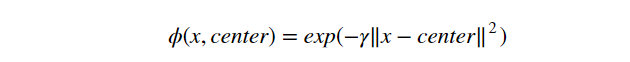
<br>
- Pros: It is really effective in the higher dimension, Effective when the number of features are more than training examples, Best algorithm when classes are separable , The hyperplane is affected by only the support vectors thus outliers have less impact
<br>
- Cons: For larger dataset, it requires a large amount of time to process, Does not perform well in case of overlapped classes, Selecting the appropriate kernel function can be tricky


In [192]:
from collections import Counter
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier #will be used for feature selection 
from sklearn import svm
#from sklearn import metrics
from mlxtend.plotting import plot_confusion_matrix

In [193]:
! pip install mlxtend

### Create a Toy Dataset
You can safely ignore this section. This is to create a temporary dataset to work with.

In [194]:
from sklearn.datasets import make_classification
# define dataset
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=1)
# summarize the dataset
print(X.shape, y.shape)
df_raw = pd.DataFrame(X)
df_raw['target'] = y
df_raw

(1000, 10) (1000,)


,0,1,2,3,4,5,6,7,8,9,target
0,2.569995,-0.130200,3.160751,-4.359364,-1.612720,-1.393521,-2.489249,-1.930941,3.261304,2.056921,1
1,0.341293,2.513214,-0.804166,1.291966,2.057731,-3.110983,1.465830,6.247344,-1.927694,2.950315,0
2,2.275400,3.365615,0.171644,1.248620,0.302498,-1.137814,-1.608199,2.746938,0.134924,2.003395,0
3,0.357846,0.905176,-0.259241,0.930414,0.112336,0.143484,-0.367149,0.658955,-0.269128,0.155807,1
4,-2.722477,0.324236,2.906472,-0.021218,-2.867399,1.591744,0.620849,3.383528,0.945621,3.498071,0
...,...,...,...,...,...,...,...,...,...,...,...
995,-2.422590,2.119189,0.536083,2.009959,-0.939348,0.137236,1.978504,5.634054,-0.379776,3.134786,1
996,4.519803,-0.135669,-0.401285,-0.744954,1.747809,-0.786713,-3.916784,-3.668148,-0.717386,-1.905598,1
997,0.523436,1.904664,0.932434,-0.664534,-1.008471,-0.913046,-0.030649,1.539452,1.906462,1.994586,0
998,1.337479,3.258597,0.787924,1.423410,0.383229,-1.461592,-0.961593,5.187883,-0.820711,3.514114,0


### Explore

In [195]:
df_raw.describe().T 

,count,mean,std,min,25%,50%,75%,max
0,1000.0,0.596127,2.171718,-6.281683,-0.804975,0.637865,2.101432,6.745623
1,1000.0,0.467720,1.558385,-6.016746,-0.329898,0.681331,1.505853,3.988971
2,1000.0,0.588907,1.290425,-3.737073,-0.198030,0.451253,1.478656,4.832543
3,1000.0,-0.325708,1.947396,-7.654259,-1.279974,0.066826,0.975011,3.978111
4,1000.0,0.013531,1.605312,-5.689715,-1.066680,0.065937,1.121289,4.188797
5,1000.0,-0.555718,1.627146,-4.921054,-1.685522,-0.515373,0.591245,4.053637
6,1000.0,-0.518019,1.602038,-4.973566,-1.657853,-0.578766,0.425395,5.089334
7,1000.0,0.891852,2.681205,-8.042652,-0.918561,0.864595,2.717786,9.152893
8,1000.0,0.019956,1.420545,-3.554258,-1.068737,-0.093996,1.106043,4.109214
9,1000.0,1.003868,1.535056,-3.896057,-0.000439,1.037245,2.041581,5.994384


In [196]:
# checking if dataset is imbalanced
pos = Counter(df_raw['target'])[1]
neg = Counter(df_raw['target'])[0]
total = df_raw.shape[0]
print('Total: {}\n  Positive: {} ({:.2f}% of total)\n  Negative: {} ({:.2f}% of total)'.format(total, pos, 100*pos/total, neg, 100*neg/total))

Total: 1000
  Positive: 501 (50.10% of total)
  Negative: 499 (49.90% of total)


### Data splitting 
- Split columns to features and target 
<br>
- Split rows to train and test 

In [197]:
df = df_raw.copy()
X = df.drop('target', axis=1)
y = df['target'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, stratify = y, random_state=0)
print(X_train.shape)
print(X_test.shape) 

(800, 10)
(200, 10)


### Feature selection 

3    0.193908
2    0.149451
1    0.130716
5    0.110581
6    0.109546
4    0.078398
8    0.074825
0    0.065788
7    0.044070
9    0.042716
dtype: float64


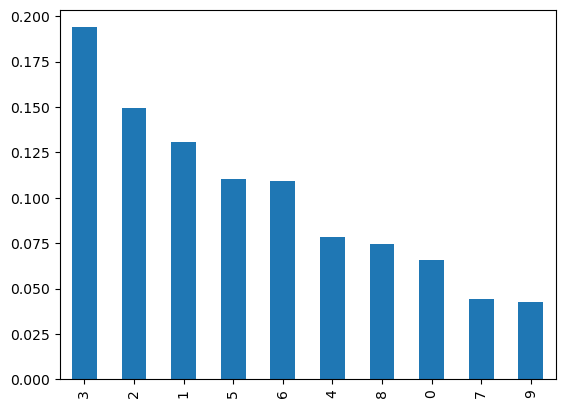

In [198]:
rf_model = RandomForestClassifier(random_state=0)   # or you can use ExtraTreesClassifier
rf_model.fit(X_train, y_train);
importance = pd.Series(rf_model.feature_importances_, index=X_train.columns)
print(importance.sort_values(ascending=False))  # sorting in descending order
importance.nlargest(10).plot(kind='bar');  # change the number 10 as you see fit

In [199]:
sorted_features = importance.sort_values(ascending=False).index
sorted_features

Index([3, 2, 1, 5, 6, 4, 8, 0, 7, 9], dtype='object')

In [200]:
# keeping the important features and dropping the rest
z = 8  # choosing the first 8 features, change z as you see fit
X_train_filtered = X_train[sorted_features[0:z]]
X_test_filtered = X_test[sorted_features[0:z]]

### Apply SVM 

In [201]:
scaler = preprocessing.StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_filtered)
X_test_scaled = scaler.transform(X_test_filtered)

In [202]:
svm_model = svm.SVC()
svm_model.fit(X_train_scaled, y_train);

In [203]:
svm_y_pred = svm_model.predict(X_test_scaled)

### Model Evaluation 

In [204]:
svm_acc = metrics.accuracy_score(y_test, svm_y_pred)  # accuracy
print(svm_acc)

0.905


              precision    recall  f1-score   support

           0       0.88      0.94      0.91       100
           1       0.94      0.87      0.90       100

    accuracy                           0.91       200
   macro avg       0.91      0.91      0.90       200
weighted avg       0.91      0.91      0.90       200



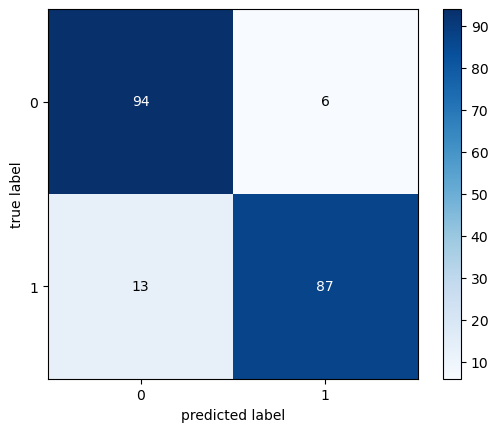

In [205]:
print(metrics.classification_report(y_test, svm_y_pred))

cm = metrics.confusion_matrix(y_test, svm_y_pred)
fig, ax = plot_confusion_matrix(conf_mat=cm, colorbar= True)
plt.show()

### 5- Ensembling  

- Ensemble learning is a machine learning paradigm where multiple models (often called “weak learners”) are trained to solve the same problem and combined to get better results.The main hypothesis is that when weak models are correctly combined we can obtain more accurate and/or robust models.
<br>
- In ensemble learning theory, we call weak learners (or base models ) models that can be used as building blocks for designing more complex models by combining several of them
<br>
- The idea of ensemble methods is to try reducing bias and/or variance of such weak learners by combining several of them together in order to create a strong learner (or ensemble model ) that achieves better


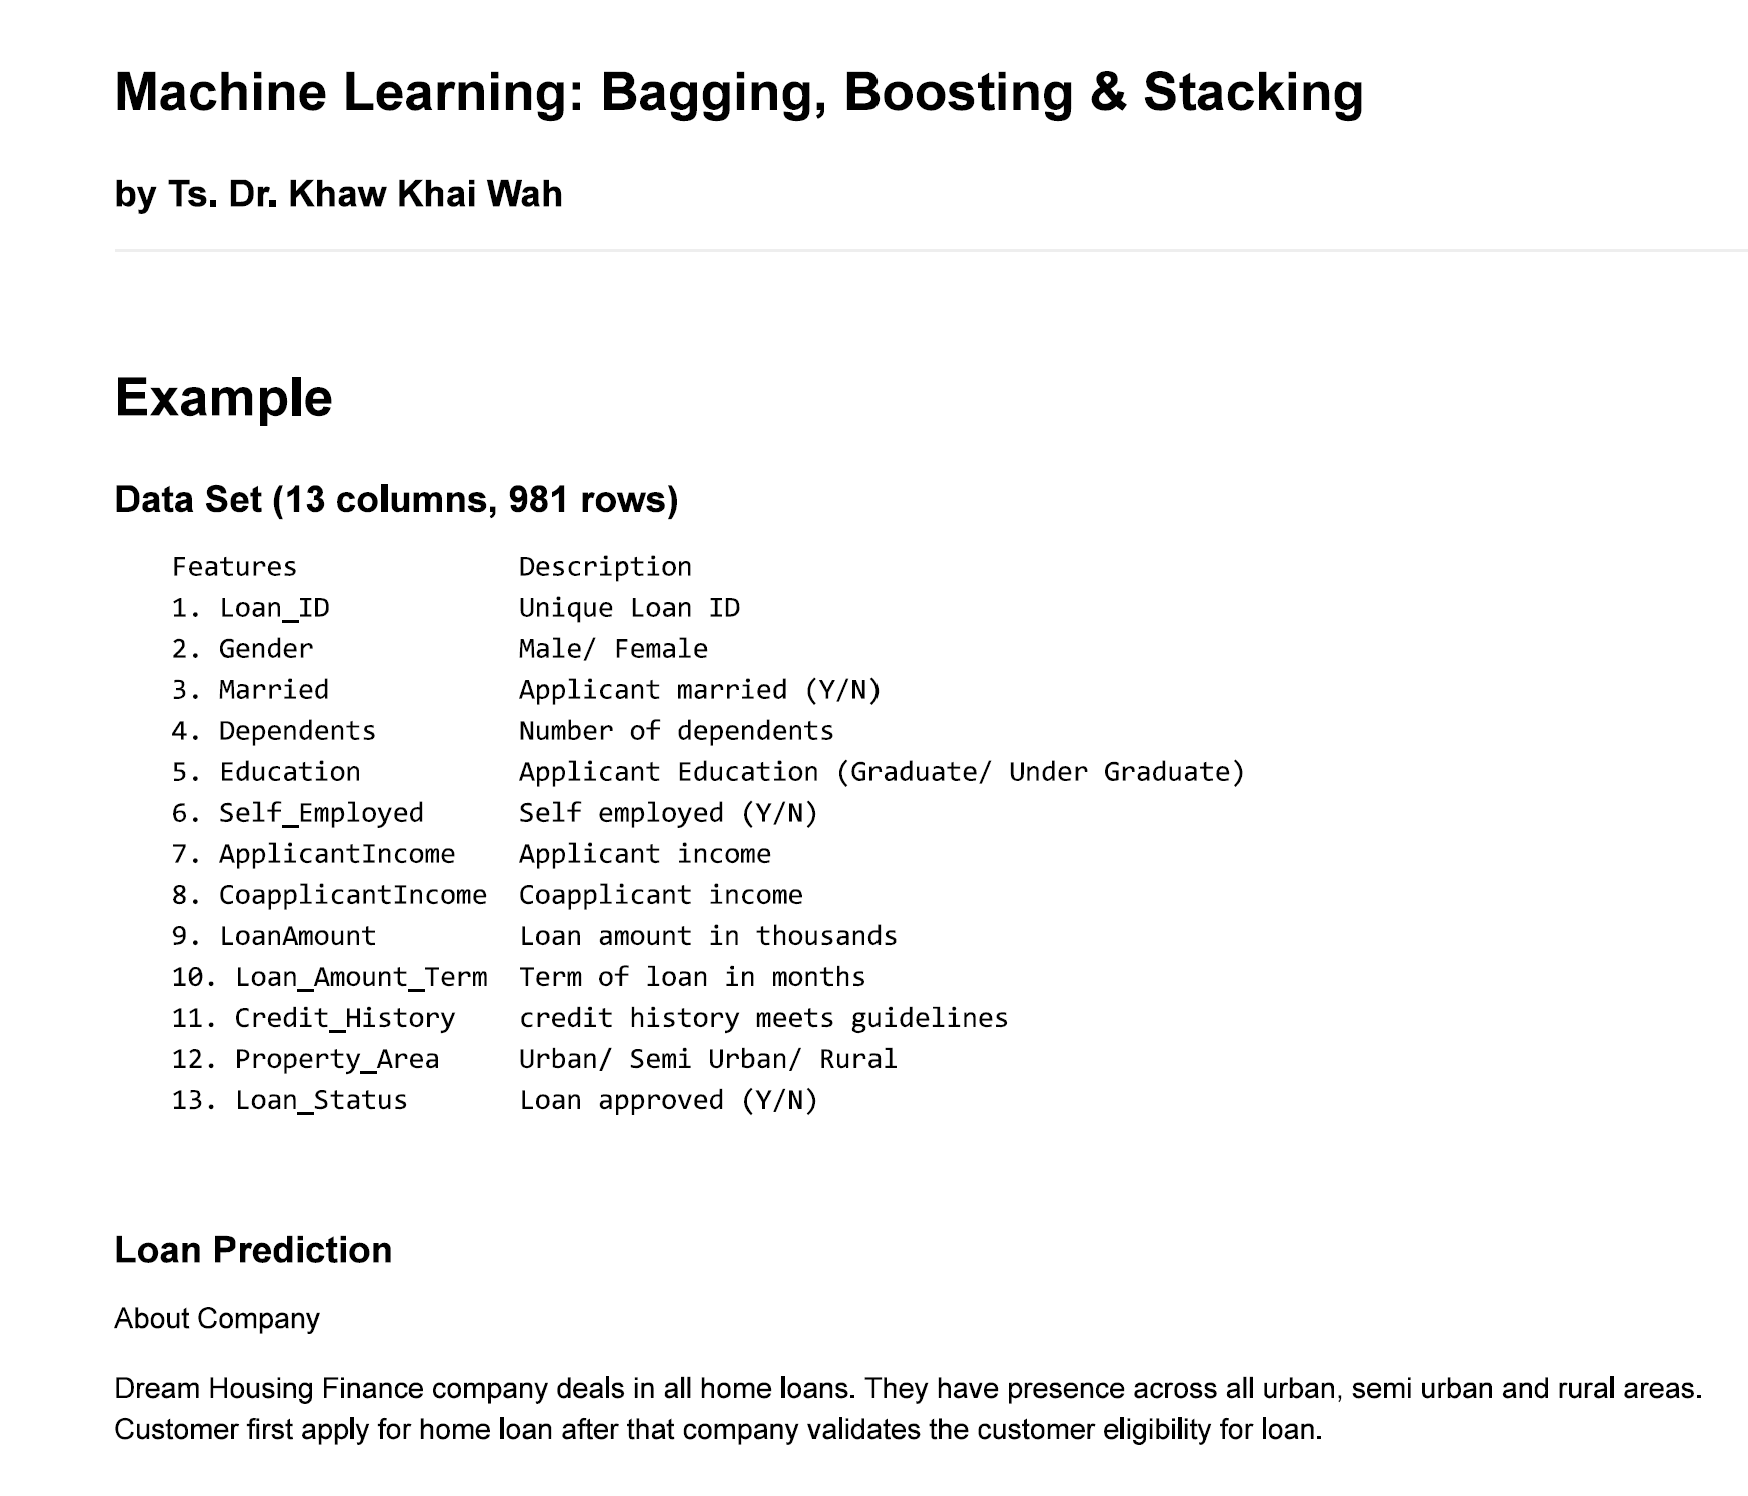

Problem
Company wants to automate the loan eligibility process ( real time 1 based on customer detail provided while filling online application
form These details are Gender Marital Status Education Number of Dependents S. Income | Loan Amount Credit History and others
Bagging, Boosting & Stacking

In [206]:
import numpy as np
import matplotlib as plt

#Reading the dataset in a dataframe using Pandas
# 1st attemp ( (split data set into 60% [train] and 40% [testl)
df = pd.read_csv(r"C:\Users\Dalia\Downloads\train370.csv")
df
#Reading the dataset in a dataframe using Pandas
#1st attemp ( (split data set into 60% [train] and 40% [testl )
df1 = pd.read_csv(r"C:\Users\Dalia\Downloads\test244.csv")
df1
#I Check the number of nuLL in the dataset
df.apply(lambda x: sum(x.isnull()),axis=0)

Loan_ID               0
Gender                6
Married               2
Dependents           11
Education             0
Self_Employed        19
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           14
Loan_Amount_Term     12
Credit_History       29
Property_Area         0
Loan_Status           0
dtype: int64

In [207]:
#please note that it's filling the nulls with the average as they are numeric/continous variables 
df['ApplicantIncome'].fillna(df['ApplicantIncome'].mean(), inplace = True)
df['CoapplicantIncome'].fillna(df['CoapplicantIncome'].mean(), inplace = True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean(), inplace = True)
df['Credit_History'].fillna(df['Credit_History'].mean(), inplace = True)
#in case of a categorical/discrete variable , we replace with the mode 

In [208]:
df['Married'].fillna('Yes', inplace = True)
df['Gender'].fillna('Male', inplace = True)
df['Dependents'].fillna(0, inplace = True)
df['Self_Employed'].fillna('No', inplace = True)

In [209]:
df1['ApplicantIncome'].fillna(df1['ApplicantIncome'].mean(), inplace = True)
df1['CoapplicantIncome'].fillna(df1['CoapplicantIncome'].mean(), inplace = True)
df1['Loan_Amount_Term'].fillna(df1['Loan_Amount_Term'].mean(), inplace = True)
df1['Credit_History'].fillna(df1['Credit_History'].mean(), inplace = True)

In [210]:
df1['Married'].fillna('Yes', inplace = True)
df1['Gender'].fillna('Male', inplace = True)
df1['Dependents'].fillna(0, inplace = True)
df1['Self_Employed'].fillna('No', inplace = True)

In [211]:
# encoding, train set change to numeric 
from sklearn.preprocessing import LabelEncoder
var_mod = ['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']
le = LabelEncoder()
for i in var_mod:
    df[i] = le.fit_transform(df[i])

df.dtypes

Loan_ID               object
Gender                 int32
Married                int32
Dependents            object
Education              int32
Self_Employed          int32
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int32
Loan_Status            int32
dtype: object

In [212]:
# encoding, train set change to numeric 
var_mod = ['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']
le = LabelEncoder()
for i in var_mod:
    df1[i] = le.fit_transform(df1[i])

df1.dtypes

Loan_ID               object
Gender                 int32
Married                int32
Dependents            object
Education              int32
Self_Employed          int32
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int32
Loan_Status            int32
dtype: object

### 5.1 Bagging (Bootstrapping Aggregating) 
- That often considers homogeneous weak learners, learns them independently from each other in parallel and combines them following some kind of deterministic averaging process
<br>
- This statistical technique consists in generating samples of size B (called bootstrap samples) from an initial dataset of size N by randomly drawing with replacement B observations.
<br>
- Model predictions undergo aggregation to combine them for the final prediction to consider all the outcomes possible
<br>
- The aggregation can be done based on the total number of outcomes or on the probability of predictions derived from the bootstrapping of every model in the procedure.
 

In [213]:
from sklearn.ensemble import BaggingClassifier 
model = BaggingClassifier(n_estimators=50)

In [214]:
#split the train dataset to features and target 
x = df[['Credit_History', 'Gender', 'Married', 'Education']]
y = df['Loan_Status']
model.fit(x, y);
#let it predict in the test dataset
predictions = model.predict(df1[['Credit_History', 'Gender', 'Married', 'Education']])
predictions


array([1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0])

In [215]:
df1 = df1.assign(Prediction = predictions)

In [216]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score

print('Accuracy', accuracy_score(df1['Loan_Status'], predictions))
print('Recall', recall_score(df1['Loan_Status'], predictions, average = 'macro'))
print('Precision', precision_score(df1['Loan_Status'], predictions, average = 'weighted'))

confusion = confusion_matrix(df1['Loan_Status'], predictions)
print('\nConfusion Maxtrix:')
print(confusion)
print('\nReport:\n', classification_report(df1['Loan_Status'], predictions))

Accuracy 0.8442622950819673
Recall 0.7572055137844611
Precision 0.8624604849243706

Confusion Maxtrix:
[[ 40  36]
 [  2 166]]

Report:
               precision    recall  f1-score   support

           0       0.95      0.53      0.68        76
           1       0.82      0.99      0.90       168

    accuracy                           0.84       244
   macro avg       0.89      0.76      0.79       244
weighted avg       0.86      0.84      0.83       244



### 5.2 Boosting  

In sequential methods the different combined weak models are no longer fitted independently from each others. The idea is to fit models iteratively such that the training of model at a given step depends on the models fitted at the previous steps.


In [217]:
#GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier 
model = GradientBoostingClassifier(learning_rate=0.1, max_features=1, subsample = 0.8, n_estimators=100)

In [218]:
x = df[['Credit_History', 'Gender', 'Married', 'Education']]
y = df['Loan_Status']
model.fit(x, y);
#let it predict in the test dataset
predictions = model.predict(df1[['Credit_History', 'Gender', 'Married', 'Education']])
predictions

array([1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0])

In [219]:
df1 = df1.assign(Prediction = predictions)

In [220]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score

print('Accuracy', accuracy_score(df1['Loan_Status'], predictions))
print('Recall', recall_score(df1['Loan_Status'], predictions, average = 'macro'))
print('Precision', precision_score(df1['Loan_Status'], predictions, average = 'weighted'))

confusion = confusion_matrix(df1['Loan_Status'], predictions)
print('\nConfusion Maxtrix:')
print(confusion)
print('\nReport:\n', classification_report(df1['Loan_Status'], predictions))

Accuracy 0.8401639344262295
Recall 0.7506265664160401
Precision 0.8593114478346592

Confusion Maxtrix:
[[ 39  37]
 [  2 166]]

Report:
               precision    recall  f1-score   support

           0       0.95      0.51      0.67        76
           1       0.82      0.99      0.89       168

    accuracy                           0.84       244
   macro avg       0.88      0.75      0.78       244
weighted avg       0.86      0.84      0.82       244



In [221]:
#AdaBoostClassifier
from sklearn.ensemble import AdaBoostClassifier 
model = AdaBoostClassifier(learning_rate=0.1, n_estimators=50)

In [222]:
x = df[['Credit_History', 'Gender', 'Married', 'Education']]
y = df['Loan_Status']
model.fit(x, y);
#let it predict in the test dataset
predictions = model.predict(df1[['Credit_History', 'Gender', 'Married', 'Education']])
predictions

array([1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0])

In [223]:
df1 = df1.assign(Prediction = predictions)

In [224]:
print('Accuracy', accuracy_score(df1['Loan_Status'], predictions))
print('Recall', recall_score(df1['Loan_Status'], predictions, average = 'macro'))
print('Precision', precision_score(df1['Loan_Status'], predictions, average = 'weighted'))

confusion = confusion_matrix(df1['Loan_Status'], predictions)
print('\nConfusion Maxtrix:')
print(confusion)
print('\nReport:\n', classification_report(df1['Loan_Status'], predictions))

Accuracy 0.8401639344262295
Recall 0.7506265664160401
Precision 0.8593114478346592

Confusion Maxtrix:
[[ 39  37]
 [  2 166]]

Report:
               precision    recall  f1-score   support

           0       0.95      0.51      0.67        76
           1       0.82      0.99      0.89       168

    accuracy                           0.84       244
   macro avg       0.88      0.75      0.78       244
weighted avg       0.86      0.84      0.82       244



### 5.3 Stacking  

The idea of stacking is to learn several different weak learners and combine them by training a meta model to output predictions based on the multiple predictions returned by these weak models. W e need to define two things in order to build our stacking model: the L learners we want to fit and the meta model that combines them.


In [225]:
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, VotingClassifier 


clf1 = svm.SVC()
clf2 = RandomForestClassifier(n_estimators =50)
clf3 = GaussianNB()

est = [('svm',clf1), ('rf',clf2), ('gnb',clf3)]
model = VotingClassifier(estimators = est, voting = 'hard' , weights=[1,1,2])

In [226]:
x = df[['Credit_History', 'Gender', 'Married', 'Education']]
y = df['Loan_Status']
model.fit(x, y);
#let it predict in the test dataset
predictions = model.predict(df1[['Credit_History', 'Gender', 'Married', 'Education']])
predictions

array([1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0])

In [227]:
df1 = df1.assign(Prediction = predictions)

In [228]:
print('Accuracy', accuracy_score(df1['Loan_Status'], predictions))
print('Recall', recall_score(df1['Loan_Status'], predictions, average = 'macro'))
print('Precision', precision_score(df1['Loan_Status'], predictions, average = 'weighted'))

confusion = confusion_matrix(df1['Loan_Status'], predictions)
print('\nConfusion Maxtrix:')
print(confusion)
print('\nReport:\n', classification_report(df1['Loan_Status'], predictions))

Accuracy 0.8401639344262295
Recall 0.7506265664160401
Precision 0.8593114478346592

Confusion Maxtrix:
[[ 39  37]
 [  2 166]]

Report:
               precision    recall  f1-score   support

           0       0.95      0.51      0.67        76
           1       0.82      0.99      0.89       168

    accuracy                           0.84       244
   macro avg       0.88      0.75      0.78       244
weighted avg       0.86      0.84      0.82       244



### 6- Random Forest  

Is an improvement over bagged decision trees. Combining predictions from multiple models in ensembles works better if the predictions from the sub models are uncorrelated or at best weakly correlated. Random forest changes the algorithm for the way that the sub trees are learned so that the resulting predictions from all of the subtrees have less correlation.

In [229]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=50)

In [230]:
x = df[['Credit_History', 'Gender', 'Married', 'Education']]
y = df['Loan_Status']
model.fit(x, y);
#let it predict in the test dataset
predictions = model.predict(df1[['Credit_History', 'Gender', 'Married', 'Education']])
predictions

array([1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0])

In [231]:
df1 = df1.assign(Prediction = predictions)

In [232]:
print('Accuracy', accuracy_score(df1['Loan_Status'], predictions))
print('Recall', recall_score(df1['Loan_Status'], predictions, average = 'macro'))
print('Precision', precision_score(df1['Loan_Status'], predictions, average = 'weighted'))

confusion = confusion_matrix(df1['Loan_Status'], predictions)
print('\nConfusion Maxtrix:')
print(confusion)
print('\nReport:\n', classification_report(df1['Loan_Status'], predictions))

Accuracy 0.8442622950819673
Recall 0.7572055137844611
Precision 0.8624604849243706

Confusion Maxtrix:
[[ 40  36]
 [  2 166]]

Report:
               precision    recall  f1-score   support

           0       0.95      0.53      0.68        76
           1       0.82      0.99      0.90       168

    accuracy                           0.84       244
   macro avg       0.89      0.76      0.79       244
weighted avg       0.86      0.84      0.83       244



## Second:  Unsupervised models 


- In supervised learning we have input and output data with labeled data
<br>
- In Unsupervised learning we have input only with unlabeled data
<br>
- A method to uncover latent structure in data 
<br>
- Clustering: Automatically organizing data into groups (clusters) based on their similarity (automatic classification) where one data point belong to only one cluster.
<br>
- In clustering the performance is subjective and domain-specific and also can get gibberish(غامض\غير مفهوم) output

### 1- K-means clustering 
- Each cluster is represented by the center of the cluster (centroid) and k refers to number of centroids. 
<br>
- Every data point is assigned to a cluster where the sum of the distances between the data points and the centroids is minimum. 
<br>
- Calculates its Euclidean distance to centroids and assign them to the nearest cluster. 
<br>
- Stopping criteria , centroids on newly formed clusters don't change or the maximum number of iterations has reached. 
<br>
- It's an objective-based approach that requires us to pre-specify the number of clusters K, the initial centroids. The final results is somewhat random where it depends on the random initialization we started with. 
<br>
- How many clusters? Start with min number then calculate and record the sumations of distances of the data points to their centroids. Increae the number until maximum number of clusters. 

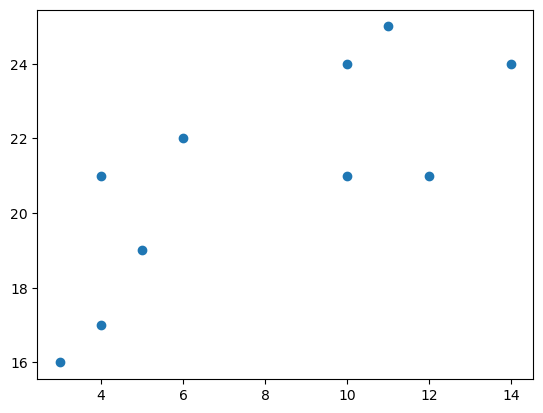

In [233]:
import matplotlib.pyplot as plt

x = [4, 5, 10, 4, 3, 11, 14 , 6, 10, 12]
y = [21, 19, 24, 17, 16, 25, 24, 22, 21, 21]

plt.scatter(x, y)
plt.show()

In [234]:
import warnings
warnings.filterwarnings('ignore')

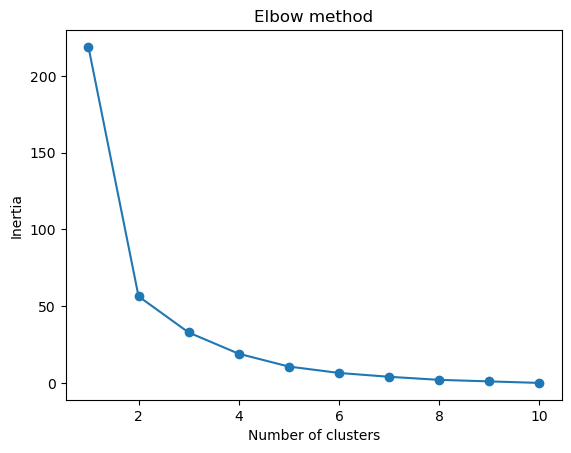

In [235]:
#elbow method 
from sklearn.cluster import KMeans
data = list(zip(x, y))
inertias = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(data)
    inertias.append(kmeans.inertia_)

plt.plot(range(1,11), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [236]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans 
x = [4, 5, 10, 4, 3, 11, 14 , 6, 10, 12]
y = [21, 19, 24, 17, 16, 25, 24, 22, 21, 21]
data = list(zip(x, y))
print(data)

[(4, 21), (5, 19), (10, 24), (4, 17), (3, 16), (11, 25), (14, 24), (6, 22), (10, 21), (12, 21)]


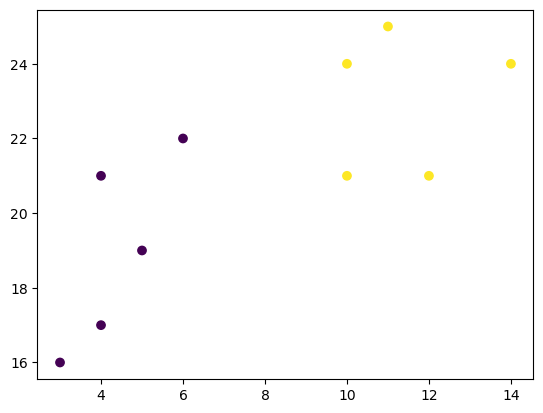

In [237]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(data)

plt.scatter(x, y, c=kmeans.labels_)
plt.show()

### 2- Hierarchical clustering 
- An alternative approach that doesn't require a pre-specified choice of K which provides a deterministic result.  
<br>
- Bottom-up or agglomerative hierarchical clustering , starts with each as its own cluster, then identify two closest clusters and merge them then repeat untill all points are in a single cluster. 
<br>
- We use dendrogram to visualize the results of the clustering. Where the y-axis on dendrogram is the distance between the clusters that got merged at that step.  
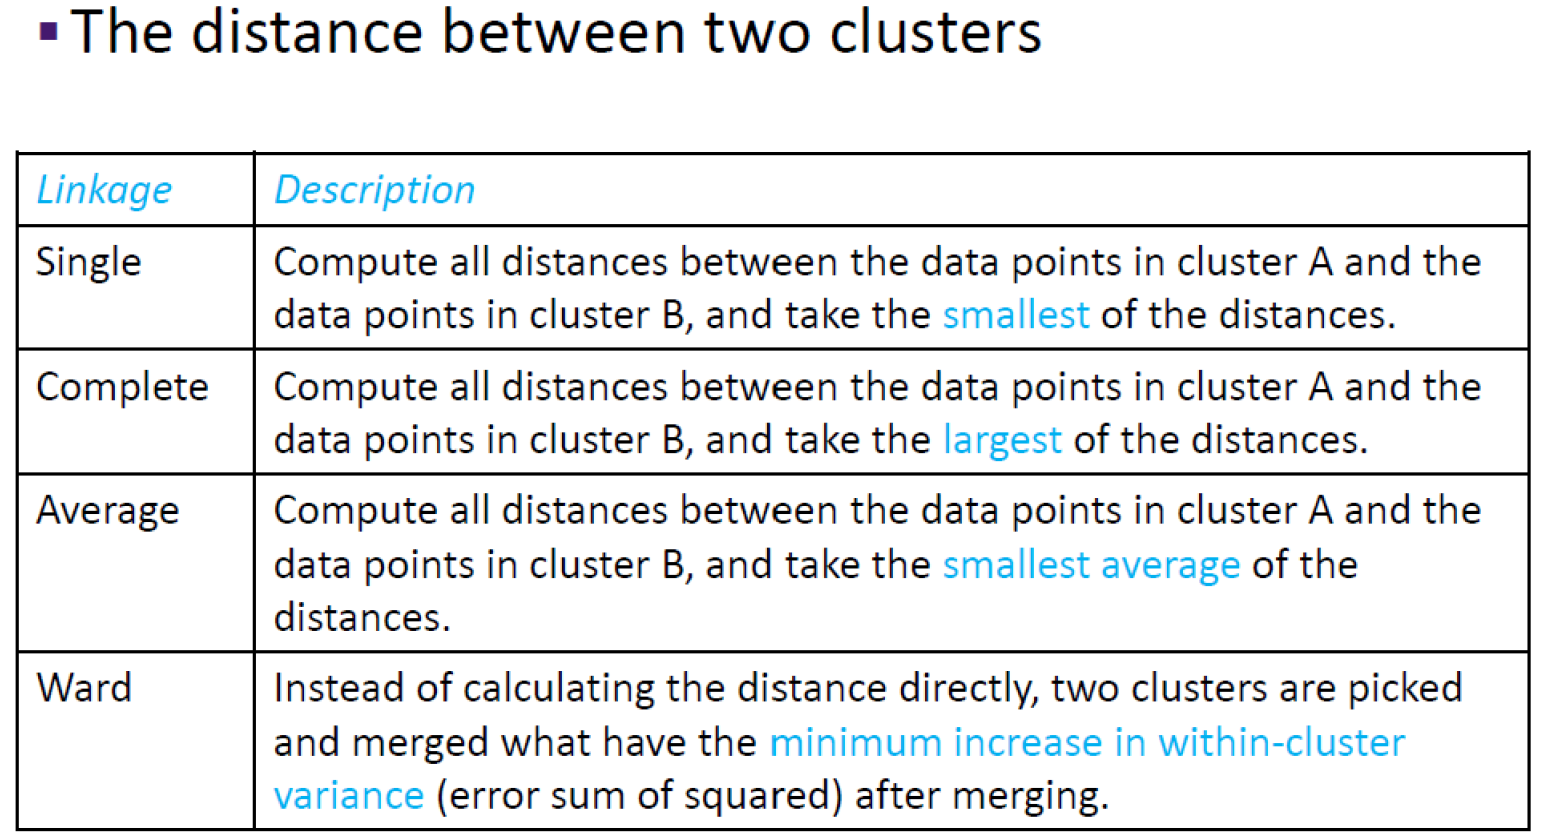

In [238]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering 

In [239]:
x = [4, 5, 10, 4, 3, 11, 14 , 6, 10, 12]
y = [21, 19, 24, 17, 16, 25, 24, 22, 21, 21]
data = list(zip(x, y))
print(data)

[(4, 21), (5, 19), (10, 24), (4, 17), (3, 16), (11, 25), (14, 24), (6, 22), (10, 21), (12, 21)]


In [240]:
linkage_data = linkage(data, method='ward', metric='euclidean')

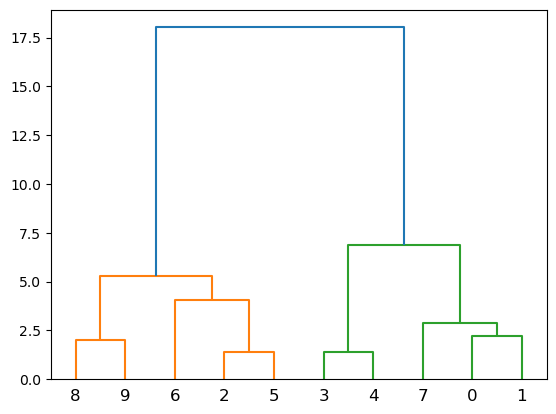

In [241]:
dendrogram(linkage_data)
plt.show() 

In [242]:
hierarchical_cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
labels = hierarchical_cluster.fit_predict(data) 
print(labels)

[0 0 1 0 0 1 1 0 1 1]


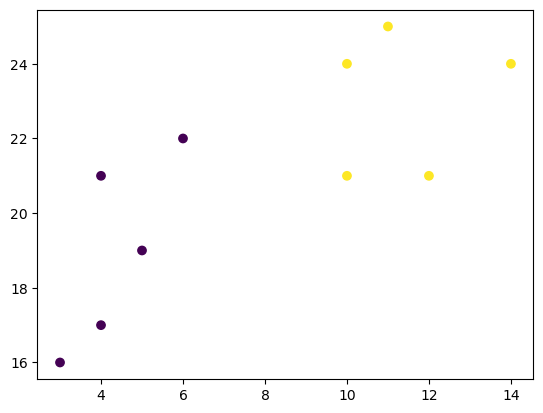

In [243]:
plt.scatter(x, y, c=labels)
plt.show()